In [1]:
import json
import numpy as np
import pandas as pd
from openpyxl import Workbook

In [2]:
import matplotlib.pyplot as plt
import seaborn as sn

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
data = pd.read_excel('Ground_truth_V3.xlsx')
data = pd.DataFrame(data)
data["ground truth"].count()

2125

In [3]:
Total_GT = 2125

In [4]:
data = pd.read_excel('Ground_truth_V2.xlsx')
data = pd.DataFrame(data)
data = data.fillna("")

In [5]:
for i in range(len(data)):
    count_Y = 0
    for k in ["Discovery","Spacy","Html"]:
        if (data.loc[i,k] != ""):
            for j in ["P_"+k,"J_"+k,"S_"+k]:
                if (data.loc[i,j] == "Y"):
                    count_Y+=1
            if (count_Y >=2):
                if (len(data.loc[i,"ground truth"])==0):
                    data.loc[i,"ground truth"] += data.loc[i,k]
                else:
                    data.loc[i,"ground truth"] += "/"+data.loc[i,k]
        count_Y = 0

In [6]:
for i in range(len(data)):
    
    lists = data.loc[i,"ground truth"].split("/")
    
    for k in ["Discovery","Spacy","Html"]:
            
        if (data.loc[i,k] in lists and len(data.loc[i,k])!=0 and len(data.loc[i,"ground truth"])!=0):
            data.loc[i,k+"_vote"] = "TP"
        
        if (data.loc[i,k] not in lists and len(data.loc[i,k])!=0 and len(data.loc[i,"ground truth"])!=0):
            data.loc[i,k+"_vote"] = "FP"

In [7]:
data["Discovery_vote"].value_counts()

      1960
TP     858
FP      30
Name: Discovery_vote, dtype: int64

In [8]:
Precision = 858/(858+30)
Recall = 858/Total_GT

Stats_disc = {"Precision": Precision,"Recall":Recall}

In [9]:
data["Spacy_vote"].value_counts()

TP    1507
      1243
FP      98
Name: Spacy_vote, dtype: int64

In [10]:
Precision = 1507/(1507+98)
Recall = 1507/Total_GT

Stats_spac = {"Precision": Precision,"Recall":Recall}

In [11]:
data["Html_vote"].value_counts()

      2035
TP     799
FP      14
Name: Html_vote, dtype: int64

In [12]:
Precision = 799/(799+14)
Recall = 799/Total_GT

Stats_Html = {"Precision": Precision,"Recall":Recall}

In [13]:
print("Discovery")
print(Stats_disc)
print("--"*50)
print("Spacy")
print(Stats_spac)
print("--"*50)
print("HTML")
print(Stats_Html)
print("--"*50)

Discovery
{'Precision': 0.9662162162162162, 'Recall': 0.4037647058823529}
----------------------------------------------------------------------------------------------------
Spacy
{'Precision': 0.9389408099688473, 'Recall': 0.7091764705882353}
----------------------------------------------------------------------------------------------------
HTML
{'Precision': 0.982779827798278, 'Recall': 0.376}
----------------------------------------------------------------------------------------------------


# Visualization

In [14]:
data["ground truth"]

0                   
1                   
2            ORDINAL
3                   
4                org
            ...     
2843                
2844    LOC/location
2845                
2846                
2847        Quantity
Name: ground truth, Length: 2848, dtype: object

In [16]:
entity_type=['Location',
 'Person',
 'Organization',
 'JobTitle',
 'Company',
 'Quantity',
 'Facility',
 'GeographicFeature',
 'EmailAddress',
 'PrintMedia',
 'HealthCondition',
 'Crime',
 'Sport',
 'Drug',
 'TwitterHandle',
 'Hashtag',
 'Broadcaster',
 'Movie',
 'Vehicle',
 'Award',
 'Anatomy',
 'NaturalEvent',
 'TelevisionShow',
 'SportingEvent',
 'MusicGroup',
 'IPAddress']

In [33]:
entity_type_2=['CARDINAL',
 'ORG',
 'DATE',
 'FAC',
 'PERSON',
 'WORK_OF_ART',
 'LOC',
 'ORDINAL',
 'GPE',
 'NORP',
 'PERCENT',
 'QUANTITY',
 'PRODUCT',
 'MONEY',
 'EVENT',
 'TIME',
 'LAW',
 'LANGUAGE']

In [34]:
entity_type_3=['person', 'org', 'location', 'chron', 'money', 'a']

In [19]:
a={}
for i in range(len(data)):
    lists = data.loc[i,"ground truth"].split("/")
    for item in lists:
        if item in a:
            a[item]+=1
        else:
            a[item]=1

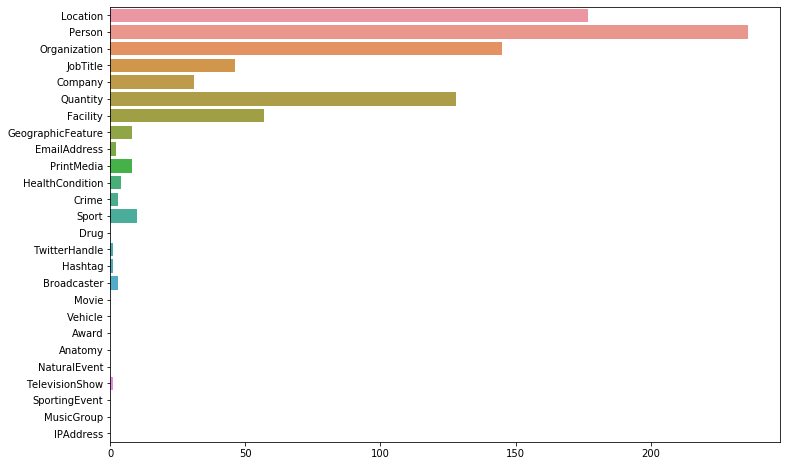

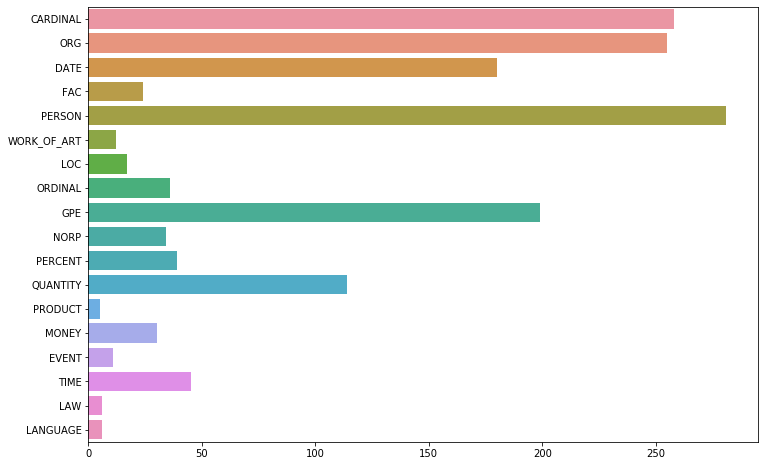

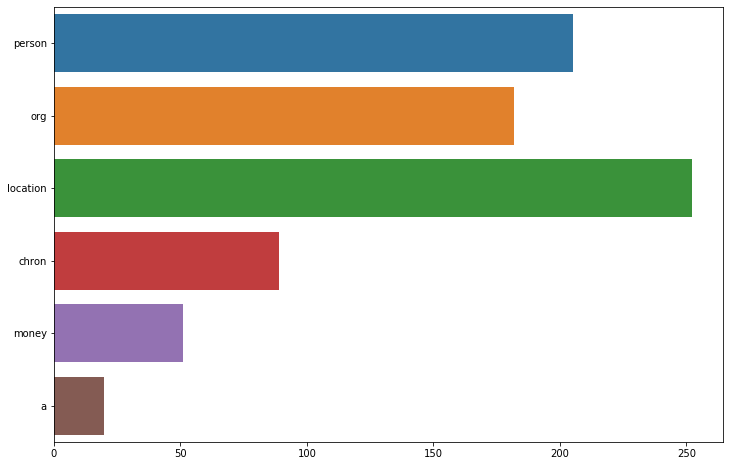

In [44]:
for entity in [entity_type,entity_type_2,entity_type_3]:
    l=[]
    for i in entity:
        if i in a:
            l.append(a[i])
        else:
            l.append(0)
    plt.figure(figsize=(12,8))
    sn.barplot(y=entity,x=l,orient=0)
#     for p,q in zip(entity,l):
#         print(p,q)
    plt.show()